In [101]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import tree
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix roc_curve, auc, classification_report
import seaborn as sns
from pandas import DataFrame
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score

SyntaxError: invalid syntax (<ipython-input-101-0c5d8eed4169>, line 9)

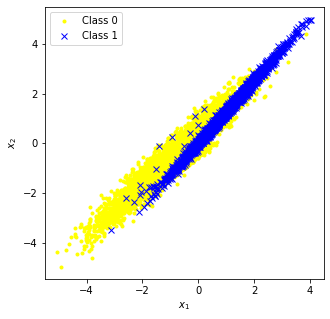

In [102]:
# Import all necessary libraries.
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
# generate 2 class dataset
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.9,0.5],
                                                            random_state=42)
# Split data into train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0', color = 'yellow')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1', color = 'blue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#clf.predict(X[:2, :])
#clf.predict_proba(X[:2, :])

# Predição e a prabilidade de classes existentes
y_pred_log = clf.predict(X_test)
y_prob_log = clf.predict_proba(X_test)

y_test_bin_log = label_binarize(y_test, classes=[0, 1, 2])



In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

# Gaussian Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()
g.fit(X_train, y_train)

# predição
y_pred_g = g.predict(X_test)
print(X_test)

y_prob_g = g.predict_proba(X_test)
print(X_test)

y_test_bin_log = label_binarize(y_test, classes=[0, 1, 2])






[[ 2.14448031  2.78148089 -0.14549515 ... -1.77260264  0.81195679
   1.15643273]
 [ 2.59488407  3.31726282  0.79560302 ...  1.1436729  -0.20374156
   1.31291001]
 [ 1.40591055  1.91840065  0.3253552  ...  1.58346708  0.66220051
   0.9274939 ]
 ...
 [-0.74077093 -0.87108264 -0.14536998 ...  0.44781029 -1.17915794
  -0.23931335]
 [-2.42424534 -2.52127454  0.81978372 ...  1.05507254 -0.22239323
  -0.19518353]
 [-1.51678636 -0.90523273  2.01737047 ... -1.51941915  1.51298531
   1.07779076]]
[[ 2.14448031  2.78148089 -0.14549515 ... -1.77260264  0.81195679
   1.15643273]
 [ 2.59488407  3.31726282  0.79560302 ...  1.1436729  -0.20374156
   1.31291001]
 [ 1.40591055  1.91840065  0.3253552  ...  1.58346708  0.66220051
   0.9274939 ]
 ...
 [-0.74077093 -0.87108264 -0.14536998 ...  0.44781029 -1.17915794
  -0.23931335]
 [-2.42424534 -2.52127454  0.81978372 ...  1.05507254 -0.22239323
  -0.19518353]
 [-1.51678636 -0.90523273  2.01737047 ... -1.51941915  1.51298531
   1.07779076]]


In [105]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()

#hiperparâmetros weights e n_neighbors que otimizam a performance do classificador k-NN.
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[1, 2, 3, 4, 5, 10, 15, 20]}

svc = KNeighborsClassifier()
#svc = svm.SVC()
clf = GridSearchCV(svc, parameters,
                   cv=4, verbose=0.2, n_jobs=-1)
clf.fit(X, y)
clf.best_params_
clf.best_score_









Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   58.7s finished


0.8831

In [106]:
  
    # metodo para predição e neighbor usando Kneighbors classifier
    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=20, n_jobs=1, weights='uniform', p=2,
                               metric='minkowski', metric_params=None, algorithm='auto')
    
    knc.fit(X_train, y_train)
    print("Predictions form the classifier")
    print(knc.predict(X_test))
    y_prob_knc= knc.predict_proba(X_test)
    #print(X_test)
    

y_test_bin_kcn = label_binarize(y_test, classes=[0, 1, 2])



Predictions form the classifier
[1 1 1 ... 0 0 0]


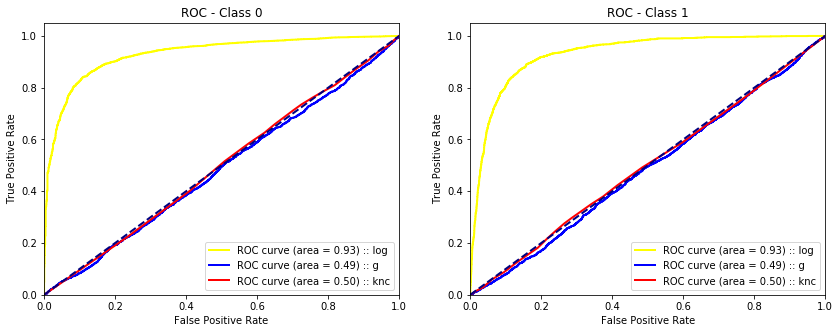

In [108]:

# Compute ROC curve and ROC area for each class.
fpr_g = dict()
tpr_g = dict()
fpr_log = dict()
tpr_log = dict()
fpr_knc = dict()
tpr_knc = dict()
roc_auc_g = dict()
roc_auc_log = dict()
roc_auc_knc = dict()
plt.figure(figsize=(14, 5))

lw = 2
for i in range(2):
    # Calculating ROC curve and ROC AUC.
    fpr_g[i], tpr_g[i], _ = roc_curve(y_test_bin_g[:, i], y_prob_g[:, i])
    roc_auc_g[i] = auc(fpr_g[i], tpr_g[i])
    
    fpr_log[i], tpr_log[i], _ = roc_curve(y_test_bin_log[:, i], y_prob_log[:, i])
    roc_auc_log[i] = auc(fpr_log[i], tpr_log[i])
    
    fpr_knc[i], tpr_knc[i], _ = roc_curve(y_test_bin_knc[:, i], y_prob_knc[:, i])
    roc_auc_knc[i] = auc(fpr_knc[i], tpr_knc[i])
    
    # Plotting ROC curve for class i.
    ax = plt.subplot(1, 2, i + 1)
    plt.plot(fpr_log[i], tpr_log[i], color='yellow', lw=lw, label='ROC curve (area = %0.2f) :: log' % roc_auc_log[i])
    plt.plot(fpr_g[i], tpr_g[i], color='blue', lw=lw, label='ROC curve (area = %0.2f) :: g' % roc_auc_g[i])
    plt.plot(fpr_knc[i], tpr_knc[i], color='red', lw=lw, label='ROC curve (area = %0.2f) :: knc' % roc_auc_knc[i])
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Class '+str(i))
    plt.legend(loc="lower right")

plt.show()